### Importing Important Libraries

In [14]:
from sklearn.linear_model import  LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score,  confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import warnings 
warnings.filterwarnings('ignore')

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2022-05-21 20:25:53 +05:00)


### Loading Dataset

In [15]:
full_df = pd.read_csv('heart_2020.csv')
full_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


time: 453 ms (started: 2022-05-21 20:25:54 +05:00)


### Pre-Processing

In [16]:
full_df["HeartDisease"] = pd.Categorical(full_df["HeartDisease"]).codes
X_full = full_df.drop(columns = ['HeartDisease'])
y_full = full_df[['HeartDisease']]
x_onehot_full = pd.get_dummies(X_full, drop_first = True)
x_onehot_full.columns = x_onehot_full.columns.str.replace(' ','_')
x_onehot_full.columns = x_onehot_full.columns.str.replace('-','_')
x_onehot_full.columns = x_onehot_full.columns.str.replace(')','_')
x_onehot_full.columns = x_onehot_full.columns.str.replace('(','_')
x_onehot_full.columns = x_onehot_full.columns.str.replace(',','_')




time: 468 ms (started: 2022-05-21 20:25:55 +05:00)


In [17]:
x_onehot_full

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25_29,...,Diabetic_Yes,Diabetic_Yes__during_pregnancy_,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very_good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,1,0,0,0,1,0,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,0,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0
319791,29.84,0.0,0.0,5.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


time: 78 ms (started: 2022-05-21 20:25:57 +05:00)


### Fitting the model

In [15]:

clf1 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
clf2 =  GradientBoostingClassifier(n_estimators = 200 , max_depth = 5, learning_rate = 0.05)
clf3 =  GradientBoostingClassifier(n_estimators = 150 , max_depth = 5, learning_rate = 0.05)
clf4 =  GradientBoostingClassifier(n_estimators = 300 , max_depth = 5, learning_rate = 0.05)
clf5 = GradientBoostingClassifier(n_estimators = 350 , max_depth = 5, learning_rate = 0.05)
clf6 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 4, learning_rate = 0.05)
clf7 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 6, learning_rate = 0.05)
clf8 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.10)
clf9 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.15)
clf10 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.20)
clf11 = LogisticRegression(class_weight= 'balanced')
clf12 = XGBClassifier( random_state=2, learning_rate = 0.05, n_estimators= 200)
vc = VotingClassifier(estimators = [('gb1', clf1), ('gb2', clf2), ('gb3', clf3),('gb4', clf4),('gb5', clf5),('gb6', clf6), ('gb7', clf7), ('gb8', clf8),('gb9', clf9),('gb10', clf10), ('lr1', clf11),('xgb1', clf12)],
                      voting = 'soft', n_jobs = 10, verbose = True)

vc.fit(x_onehot_full, y_full)

VotingClassifier(estimators=[('gb1',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=5,
                                                         n_estimators=250)),
                             ('gb2',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=5,
                                                         n_estimators=200)),
                             ('gb3',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=5,
                                                         n_estimators=150)),
                             ('gb4',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=5,
                                 

time: 10min 36s (started: 2022-05-19 03:02:52 +05:00)


### Evaluating the model (Optional)

Test AUC-ROC of the model is:  %.3f %  0.8535277110705034


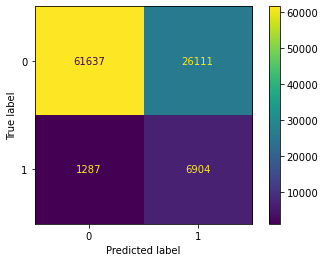

TPR or Recall:  84.28763276767184
precision:  20.911706799939424
Accuracy:  71.44227060944975
TNR or Specifity:  70.24319642612937
time: 5.19 s (started: 2022-05-19 03:25:06 +05:00)


In [16]:
x_train_full, x_test_full , y_train_full, y_test_full = train_test_split(x_onehot_full, y_full, test_size = 0.3, random_state = 2)


md_probs = vc.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC of the model is:  %.3f % ', md_auc)

predictions = (md_probs >= 0.101).astype(bool)
confusion = confusion_matrix(y_test_full, predictions)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100)
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100)

### Saving the trained model as pickle file

In [10]:
filename = 'trained_model.sav'
pickle.dump(vc, open(filename, 'wb'))


time: 78 ms (started: 2022-05-21 19:06:36 +05:00)
